In [31]:
import pandas as pd 
import numpy as np
import scipy.stats
import pylab 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.tsa.stattools as sts 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from pmdarima.arima import auto_arima
import seaborn as sns

sns.set_style("darkgrid")
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

In [21]:
df_pred = pd.DataFrame(model_auto.predict(n_periods = len(data15_test), index = data15_test.index))

In [22]:
scaler2 = MinMaxScaler()
scaler2.fit_transform(data15_twin1.Dig_15_HX.values.reshape(-1, 1))

array([[0.61954371],
       [0.132829  ],
       [0.10760794],
       ...,
       [0.00225712],
       [0.00261171],
       [0.0029663 ]])

In [23]:
# Invert the scale of predictions
df_pred2 = scaler2.inverse_transform(df_pred.values.reshape(-1, 1))

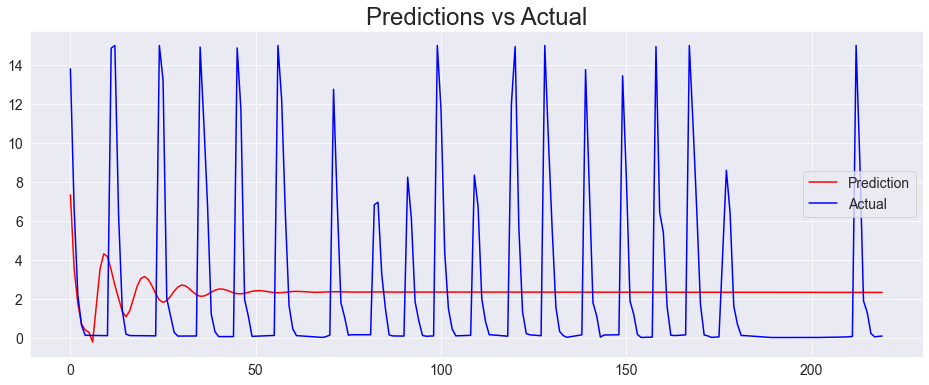

In [24]:
plt.plot(df_pred.index.to_numpy(), df_pred2, color = "red")
plt.plot(df_pred.index, data15_twin1.Dig_15_HX[start_date:end_date].to_numpy(), color = "blue")
plt.legend(['Prediction', 'Actual'])
plt.title("Predictions vs Actual", size = 24)
plt.show()

### Performance Metrics

In [25]:
ndapred, ndaactual = df_pred, val_data15.Dig_15_HX.to_numpy()

In [26]:
print(ndapred.shape)
print(ndaactual.shape)

(220, 1)
(220,)


In [27]:
print("MAE: %.4f" %mean_absolute_error(ndaactual, ndapred))
print("RMSE: %.4f" %np.sqrt(mean_squared_error(ndaactual, ndapred)))

MAE: 0.2153
RMSE: 0.2934


In [28]:
np.save("C:/Users/USER/Documents/PythonModels/Hourly/Linear/Composite predictions/Dig15pred.npy", df_pred2)

### Forecast

In [29]:
fcast = pd.DataFrame(model_auto.predict(n_periods = len(test_data15), index = test_data15.index))

In [30]:
fcast = scaler2.inverse_transform(fcast.values.reshape(-1, 1))

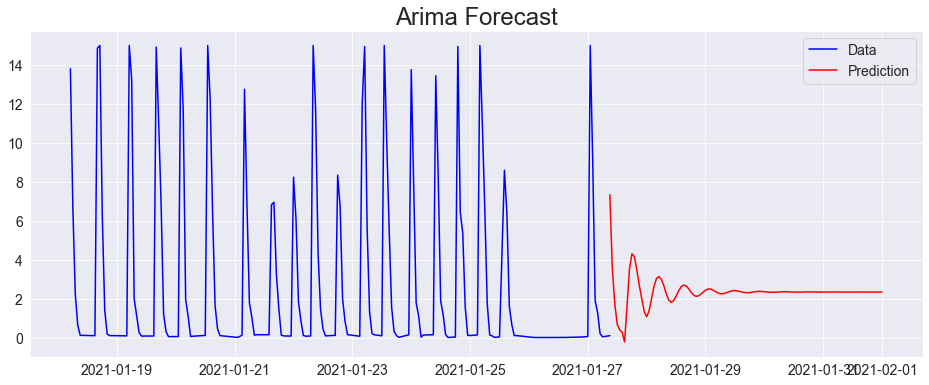

In [31]:
plt.plot(data15_twin1.index[1877:2098], data15_twin1.Dig_15_HX[1877:2098].to_numpy(), color = "blue")
plt.plot(test_data15.index, fcast, color = "red")
plt.legend(['Data', 'Prediction'])
plt.title("Arima Forecast", size = 24)
plt.show()

In [32]:
np.save("C:/Users/USER/Documents/PythonModels/Hourly/Linear/Composite predictions/Dig15fcast.npy", fcast)